In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from koala.pointsets import uniform
from koala import graph_utils as gu
from koala import plotting as pl
from koala.voronization import generate_lattice
from koala.graph_color import color_lattice
from koala.flux_finder import fluxes_from_ujk, ujk_from_fluxes
from koala.lattice import Lattice
from scipy import linalg as la
from pfapack.pfaffian import pfaffian

from koala import example_graphs as eg
from dimer_models.koala_plantri import plantri_to_koala, plantri_generator, read_plantri
from dimer_models.lattice_generation import (
    bipartite_squarefull,
    reduce_bipartite,
)

from dimer_models.kasteleyn import kasteleyn_matrix, find_kasteleyn_number

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from copy import copy

cut_boundaries = False

ns = 60
lattice = gu.com_relaxation(generate_lattice(uniform(ns)))
lat_sq = gu.com_relaxation(bipartite_squarefull(ns))
lat_red = gu.com_relaxation(reduce_bipartite(lat_sq, 100))

lattices = [lattice, lat_sq, lat_red]

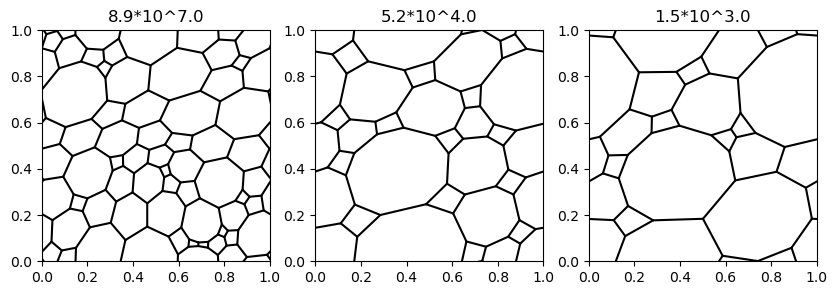

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for j, lat in enumerate(lattices):
    n1 = find_kasteleyn_number(lat)
    n = find_kasteleyn_number(lat, True)
    ax[j].set_title(f"{n[0]:.1f}*10^{n[1]}")
    pl.plot_edges(lat, ax=ax[j])

In [ ]:
for j, lat in enumerate(lattices):
    n1 = find_kasteleyn_number(lat)
    n = find_kasteleyn_number(lat, True)
    ax[j].set_title(f"{n[0]:.1f}*10^{n[1]}")